In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sqlite3


In [2]:
amazon = pd.read_csv("amazon.csv")
try:
  superstore = pd.read_csv("superstore_dataset.csv",encoding='latin1')
except UnicodeDecodeError:
  superstore = pd.read_csv("superstore_dataset.csv", encoding='ISO-8859-1')
sales = pd.read_csv("Sales_dataset2.csv")



In [3]:
amazon.shape
#get the rows and columns

(1465, 16)

In [4]:
amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
superstore.shape

(9800, 18)

In [6]:
superstore.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [7]:
sales.shape

(5681, 11)

In [8]:
sales.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
amazon.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [10]:
superstore.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [11]:
sales.columns

Index(['ProductID', 'Weight', 'FatContent', 'ProductVisibility', 'ProductType',
       'MRP', 'OutletID', 'EstablishmentYear', 'OutletSize', 'LocationType',
       'OutletType'],
      dtype='object')

In [12]:
amazon.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [13]:
superstore.dtypes

,0
Row_ID,int64
Order_ID,object
Order_Date,object
Ship_Date,object
Ship_Mode,object
Customer_ID,object
Customer_Name,object
Segment,object
Country,object
City,object


In [14]:
sales.dtypes

,0
ProductID,object
Weight,float64
FatContent,object
ProductVisibility,float64
ProductType,object
MRP,float64
OutletID,object
EstablishmentYear,int64
OutletSize,object
LocationType,object


In [15]:
amazon.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [16]:
superstore.isnull().sum()

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


In [17]:
sales.isnull().sum()

,0
ProductID,0
Weight,976
FatContent,0
ProductVisibility,0
ProductType,0
MRP,0
OutletID,0
EstablishmentYear,0
OutletSize,1606
LocationType,0


In [18]:
amazon.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [19]:
superstore.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [20]:
sales.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [21]:
superstore.describe(include='object')

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [22]:
sales.describe(include='object')

,ProductID,FatContent,ProductType,OutletID,OutletSize,LocationType,OutletType
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,DRF48,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


In [23]:
amazon.duplicated().sum()

0

In [24]:
superstore.duplicated().sum()

0

In [25]:
sales.duplicated().sum()

0

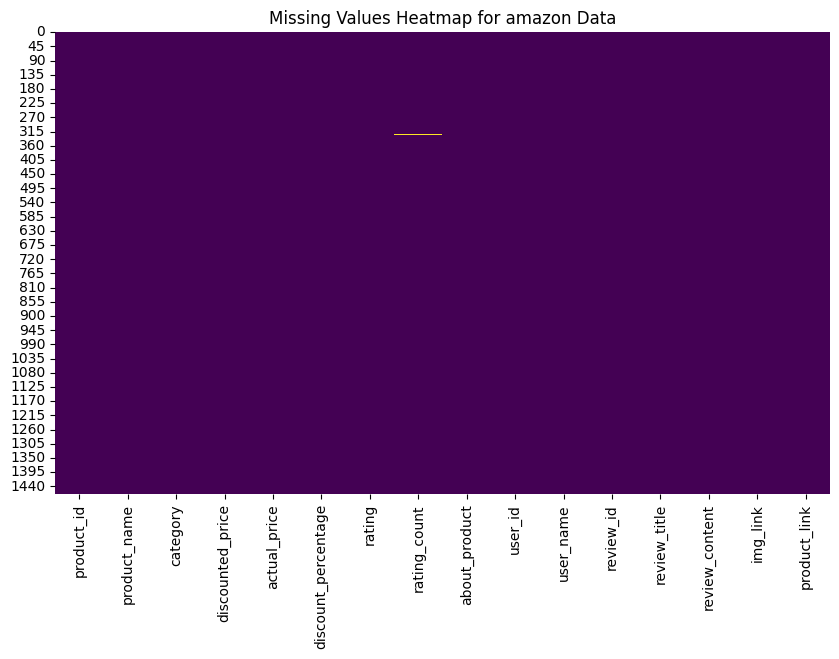

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(amazon.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap for amazon Data")
plt.show()


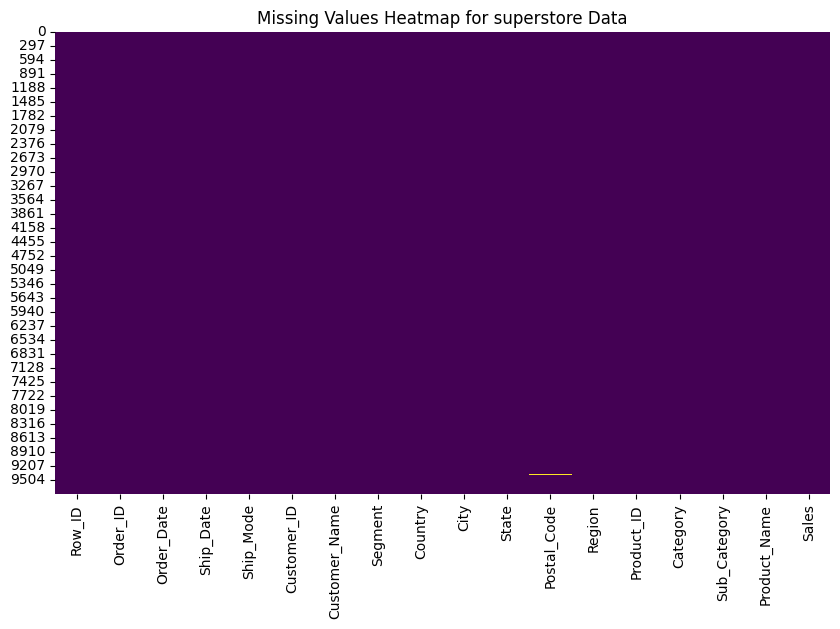

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(superstore.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap for superstore Data")
plt.show()


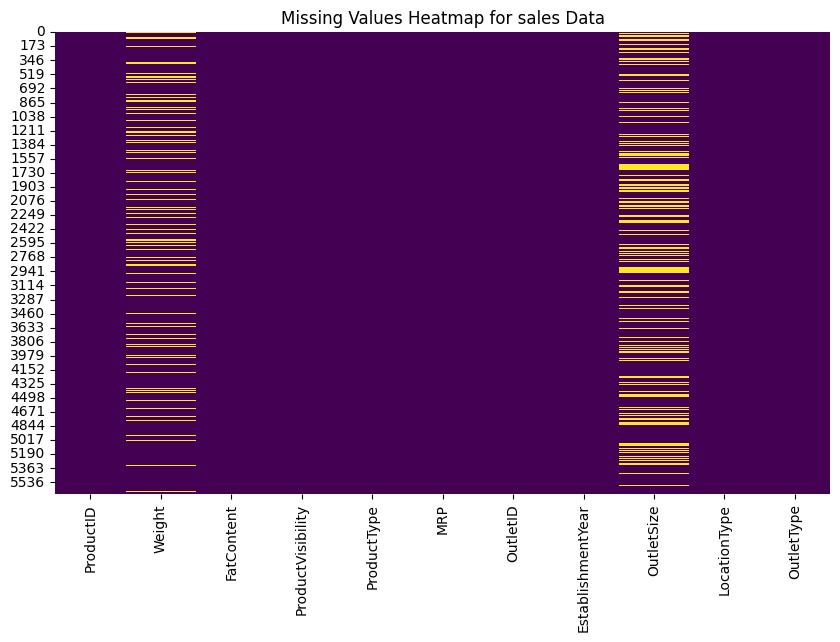

In [28]:

plt.figure(figsize=(10, 6))
sns.heatmap(sales.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap for sales Data")
plt.show()


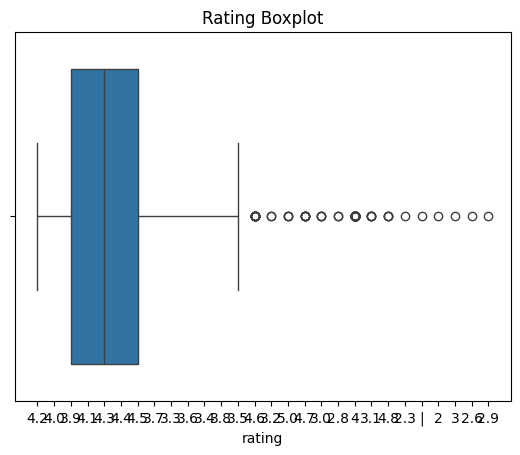

In [29]:
sns.boxplot(x=amazon['rating'])
plt.title("Rating Boxplot")
plt.show()

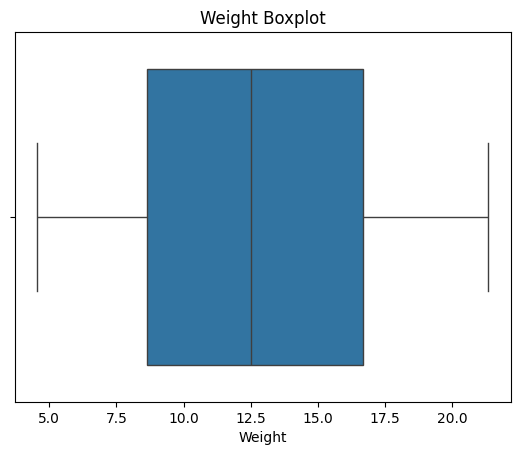

In [30]:
sns.boxplot(x=sales['Weight'])
plt.title("Weight Boxplot")
plt.show()

In [31]:

superstore = superstore.rename(columns={'Product_ID': 'product_id'})

In [32]:
sales = sales.rename(columns={'ProductID': 'product_id_sales'})

In [33]:
amazon['product_id'] = amazon['product_id'].astype(str).str.strip()
superstore['product_id'] = superstore['product_id'].astype(str).str.strip()

In [34]:
amazon['product_id'].nunique()

1351

In [35]:
superstore['product_id'].nunique()

1861

In [36]:
sales['product_id_sales'].nunique()

1543

In [37]:
# select a specified column from the superstore dataset
selected_columns1 = superstore[["product_id"]]


# Concatenate the selected columns onto amazon dataset
concat = pd.concat([amazon, selected_columns1], axis=0, ignore_index=True)

In [38]:
concat.shape

(11265, 16)

In [39]:
concat['product_id'].nunique()

3212

In [40]:
concat2 = pd.concat([concat, sales[['product_id_sales']].rename(columns={'product_id_sales': 'product_id'})], axis=0, ignore_index=True)

In [41]:
concat2.shape

(16946, 16)

In [42]:
concat2['product_id'].nunique()

4755

In [43]:
merge = pd.merge(concat2, superstore, on='product_id', how='left')

In [44]:
merge.shape

(71658, 33)

In [45]:
sales = sales.rename(columns={'product_id_sales': 'product_id'})

In [46]:
final = pd.merge(merge, sales, on='product_id', how='left')

In [47]:
final.shape

(90140, 43)

In [48]:
final.drop_duplicates(subset=['product_id'], keep='last',inplace=True)

In [49]:
final.shape

(4755, 43)

In [50]:
final.duplicated().sum()

0

In [51]:
final['product_id'].nunique()

4755

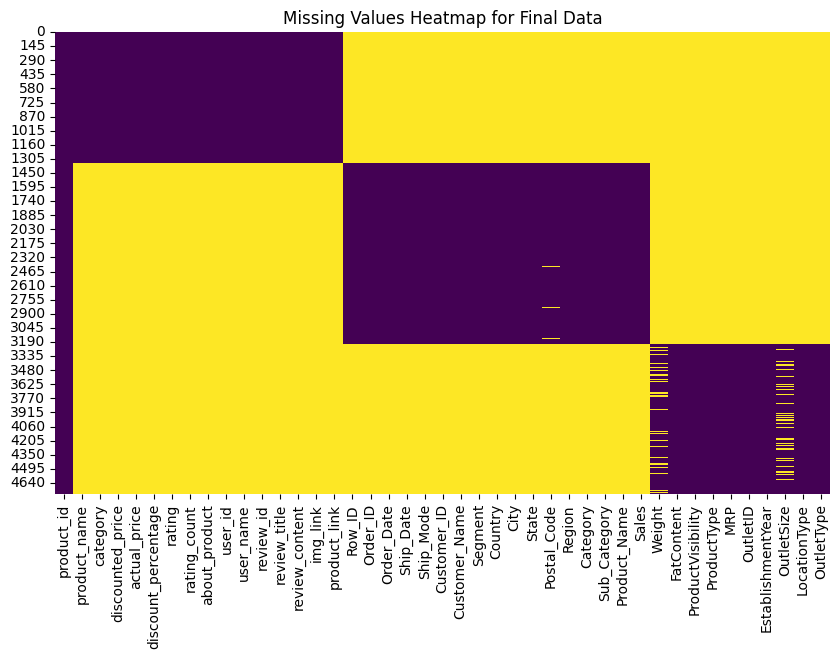

In [52]:
final.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(final.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap for Final Data")
plt.show()

In [53]:
final.loc[3190:4755, 'Weight'] = final.loc[3190:4755, 'Weight'].fillna(final.loc[3190:4755, 'Weight'].mean())

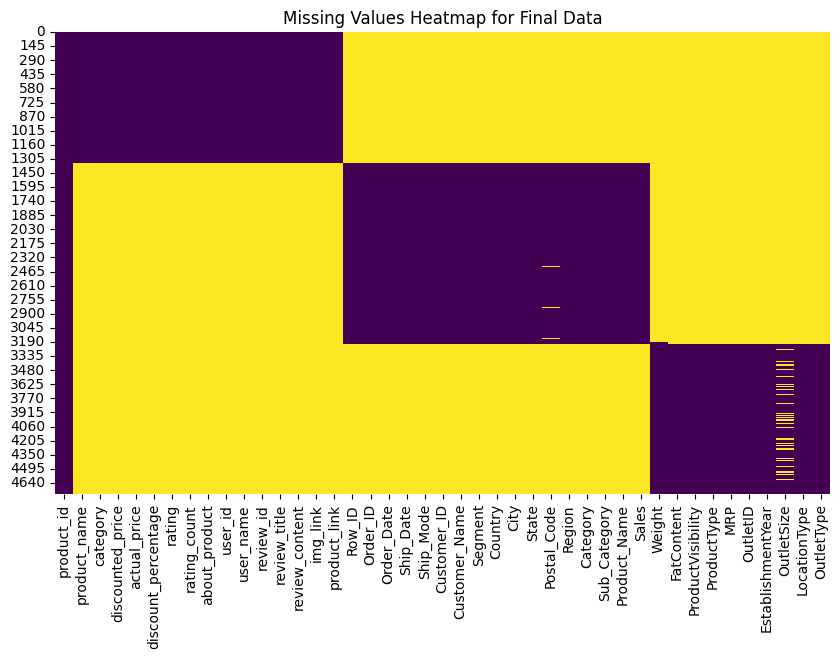

In [54]:
final.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(final.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap for Final Data")
plt.show()

In [55]:

subset = final.iloc[1740:3190]

indices_to_drop = subset[subset['Postal_Code'].isnull()].index


final.drop(indices_to_drop, inplace=True)

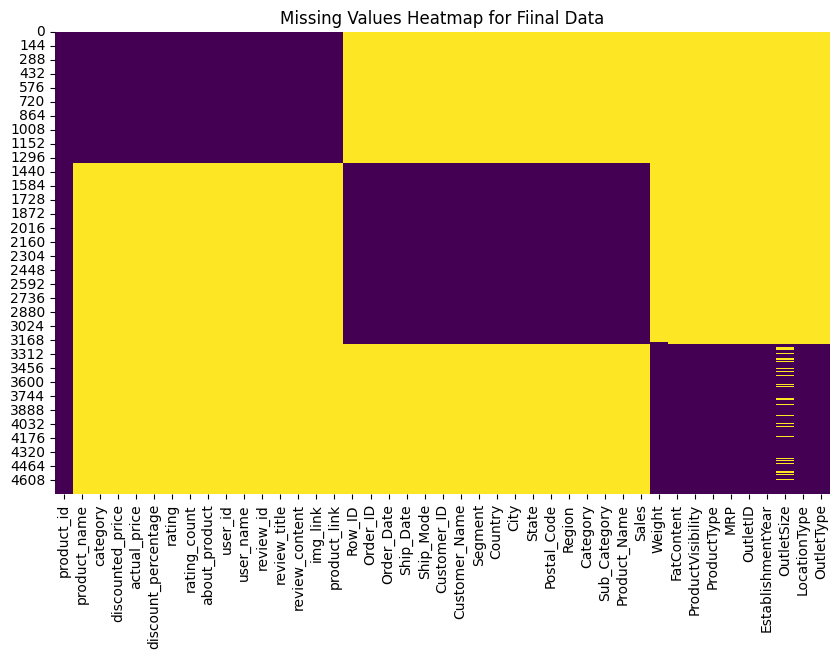

In [56]:
final.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(final.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap for Fiinal Data")
plt.show()

In [57]:
final = final.drop(columns=["product_name", "discounted_price","actual_price",
                                  "discount_percentage","rating","rating_count","about_product","review_id",
                                  "review_title","review_content","img_link","product_link"])

In [58]:
final = final.drop(columns=["Ship_Date", "Ship_Mode", "Segment","City",
                                  "State","Region","Category","Sub_Category","Product_Name",
                                  "Sales","FatContent","ProductVisibility","ProductType","MRP","OutletID","EstablishmentYear","OutletSize","OutletType","LocationType"])

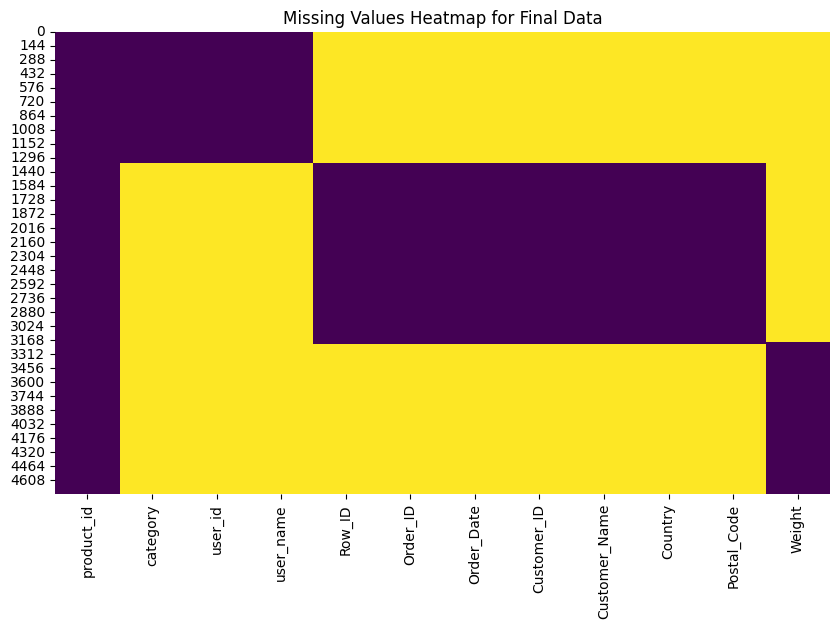

In [59]:
final.reset_index(drop=True, inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(final.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap for Final Data")
plt.show()

In [60]:
sample = final.sample(frac=0.5, random_state=1)


In [61]:
label_encoder = LabelEncoder()

In [62]:
label_encoder.fit(final['category'])

LabelEncoder()

In [63]:
final['Category_Encoded'] = label_encoder.transform(final['category'])

In [64]:
final = final.drop(columns=['category'])

In [65]:
final.describe(include='object')

,product_id,user_id,user_name,Order_ID,Order_Date,Customer_ID,Customer_Name,Country
count,4749,1351,1351,1855,1855,1855,1855,1855
unique,4749,1190,1190,1329,782,645,645,1
top,B008IFXQFU,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...","Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simr...",US-2016-163433,27/03/2018,LC-16870,Lena Cacioppo,United States
freq,1,8,8,8,12,11,11,1855


In [66]:
meta_data = final.describe().T

In [67]:
meta_data

,count,mean,std,min,25%,50%,75%,max
Row_ID,1855.0,7886.720755,1915.476029,20.000,7098.500,8521.000000,9274.50,9800.00
Postal_Code,1855.0,55116.291644,32331.328873,1453.000,23101.500,59715.000000,90008.00,99207.00
Weight,1565.0,12.834527,4.207857,4.555,9.395,12.834527,15.85,21.35
Category_Encoded,4749.0,179.347442,59.403580,0.000,174.000,211.000000,211.00,211.00


In [68]:
missing_values = final.isnull().sum()

In [69]:
missing_values

,0
product_id,0
user_id,3398
user_name,3398
Row_ID,2894
Order_ID,2894
Order_Date,2894
Customer_ID,2894
Customer_Name,2894
Country,2894
Postal_Code,2894


In [70]:
data_types = final.dtypes


In [71]:
data_types

,0
product_id,object
user_id,object
user_name,object
Row_ID,float64
Order_ID,object
Order_Date,object
Customer_ID,object
Customer_Name,object
Country,object
Postal_Code,float64


In [72]:
metadata = pd.DataFrame({
    'Column': final.columns,
    'Data Type': final.dtypes,
    'Missing Values': final.isnull().sum(),
    'Mean': final.mean(numeric_only=True),
    'Median': final.median(numeric_only=True),
    'Min': final.min(numeric_only=True),
    'Max': final.max(numeric_only=True)
})


In [73]:
metadata.to_csv("metadata.csv", index=False)


In [74]:
con = sqlite3.connect('retail_data.db')
curs = con.cursor()

In [75]:
curs.execute('''
    CREATE TABLE IF NOT EXISTS Products (
        product_id TEXT PRIMARY KEY,
        user_id TEXT,
        user_name TEXT,
        Row_ID REAL,
        Order_ID TEXT,
        Order_Date TEXT,
        Customer_ID TEXT,
        Customer_Name TEXT,
        Country TEXT,
        Postal_Code REAL,
        Weight REAL,
        Category_Encoded INTEGER
    )
''')

con.commit()

In [76]:

final.to_sql('Products', con, if_exists='replace', index=False)


4749

In [77]:

curs.execute("SELECT * FROM Products LIMIT 5")
print(curs.fetchall())


[('B008IFXQFU', 'AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESAN443HQH35FQ,AE7GD3VRRYQEAHDR7FXJIR23INYA,AHPAW24BI5X2GCX5M2LHI72VSJJQ,AE2VXY4CFO36MDSIMPG43XHNF4GA,AHHQEKUNVETALN7DTRHUQ2WAWEKQ,AFMIFTNTUD5PIHGONWOTRMMZ5EBA,AHOJBIZVVIIFJKRREY4B6ESVA4KA', 'Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akash Jindal,PRADEEP,Rajesh,Divya Kothari,abhijit', None, None, None, None, None, None, None, None, 49), ('B0B6F7LX4C', 'AHEVOQADJSSRX7DS325HSFLMP7VQ,AG7XYZRCSKX6G2OLO7DVZWIZ3PUQ,AE2THTCCQLBIUSWPF4CPXC6GGP7Q,AHUJZOV34DFEN55QQ5XOYKVKHV6Q,AELX4DI77ZHURZTDLYFU7XMP7R6Q,AE2ODWBBOBD2SITDDIEJ644OSRFQ,AFLW4WXYQ3G6HU5LBQORDDZO3FOQ,AGGRC2P6M43GDEWCAHGYAILCSKTQ', 'Manoj maddheshiya,Manoj Kumar Sahoo,Saumil s.,Jean-Louis M.,Mahesh,syed azhar abbas,prabakaran,Sidhu', None, None, None, None, None, None, None, None, 97), ('B0B1YVCJ2Y', 'AFSMISGEYDYIP3Z42UTQU4AKOYZQ,AF5ILQY4KFDTO5XHHBJ42W5DXCZQ,AFBK3X6D3AHEHSYYXPL4L6JEMSLQ,AFNB6YVNGE6IT3AWQVSIG2TJ5L3Q,AGGKMIGXUM3JRNVY7HZ3JHPJ7WTQ,AFMECPERM2GI2XQJSBWEPZKODISQ,AETP

In [78]:
con.close()